In [1]:
import pandas as pd
from sklearn import preprocessing
from gensim.models import Word2Vec
import spacy
import re
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from gensim.models.phrases import Phrases, Phraser
import multiprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

In [3]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [5]:
def countOccurences(arr):
  negative, neutral, positive = 0, 0, 0
  for num in arr:
    if num == 0:
      negative += 1
    elif num == 1:
      neutral += 1
    else:
      positive += 1
  return [negative, neutral, positive]

In [6]:
def countReviewOccurences(arr):
  one, two, three, four, five = 0, 0, 0, 0, 0
  for num in arr:
    if num == 1:
      one += 1
    elif num == 2:
      two += 1
    elif num == 3:
      three += 1
    elif num == 4:
      four += 1
    else:
      five += 1
  return [one, two, three, four, five]

In [7]:
def getSentiment(reviews):
  rev_sent = []
  for review in reviews:
    if review == 1 or review == 2:
      rev_sent.append(0)
    elif review == 3:
      rev_sent.append(1)
    else:
      rev_sent.append(2)
  return rev_sent

In [8]:
X = df.Review
y = df.Rating

In [9]:
z = getSentiment(y)

<BarContainer object of 5 artists>

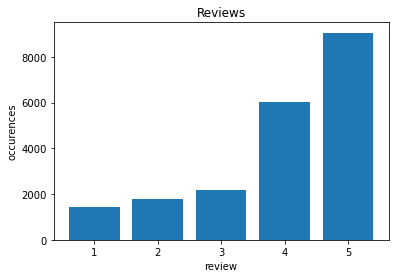

In [10]:
review_data = countReviewOccurences(y)
plt.xlabel('review')
plt.ylabel('occurences')
plt.title('Reviews')
plt.bar([1, 2, 3, 4, 5], review_data)

<BarContainer object of 3 artists>

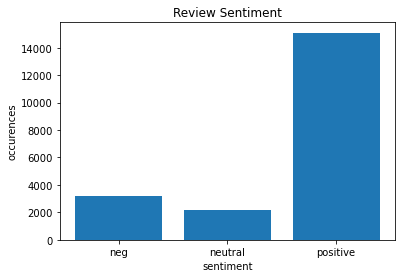

In [11]:
sentiment_data = countOccurences(z)
plt.xlabel('sentiment')
plt.ylabel('occurences')
plt.title('Review Sentiment')
plt.bar(['neg', 'neutral', 'positive'], sentiment_data)

In [12]:
process = spacy.load('en_core_web_sm')
def cleaning(email):
    text = [token.lemma_ for token in email if not token.is_stop]
    return " ".join(text)

regex = re.compile('[^a-zA-Z]')
clean = (regex.sub(' ', str(row)).lower() for row in X)
txt = [cleaning(em) for em in process.pipe(clean)]

In [13]:
X_clean = pd.DataFrame({'clean': txt})
X_clean.head()

,clean
0,nice hotel expensive parking get good deal sta...
1,ok special charge diamond member hilton decide...
2,nice room experience hotel monaco seattle ...
3,unique great stay wonderful time hotel mon...
4,great stay great stay go seahawk game awesom...


In [14]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_clean['clean'], y, test_size = 0.2, random_state = 0)

In [15]:
z_train_log = getSentiment(y_train_log)
z_test_log = getSentiment(y_test_log)

In [16]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_log)
vocab_s = len(tokenizer.word_index) + 1
seq = tokenizer.texts_to_sequences(txt)
max_seq_length = np.max(list(map(lambda x: len(x), seq)))
seq = pad_sequences(seq, maxlen=max_seq_length, padding='post')
new_X_train = pad_sequences(tokenizer.texts_to_sequences(X_train_log), padding='post', maxlen=200)
new_X_test = pad_sequences(tokenizer.texts_to_sequences(X_test_log), padding='post', maxlen=200)

In [17]:
gnb = GaussianNB()
gnb.fit(new_X_train, z_train_log)

GaussianNB()

Accuracy: 62%


<BarContainer object of 3 artists>

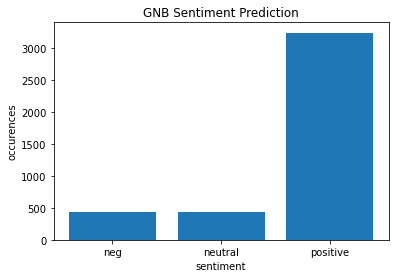

In [18]:
score = gnb.score(new_X_test, z_test_log)
print("Accuracy: {}%".format(int(score*100)))
gnb_pred = gnb.predict(new_X_test)
gnb_pred_data = countOccurences(gnb_pred)
plt.xlabel('sentiment')
plt.ylabel('occurences')
plt.title('GNB Sentiment Prediction')
plt.bar(['neg', 'neutral', 'positive'], gnb_pred_data)

In [19]:
gnb.fit(new_X_train, y_train_log)

GaussianNB()

Accuracy: 38%


<BarContainer object of 5 artists>

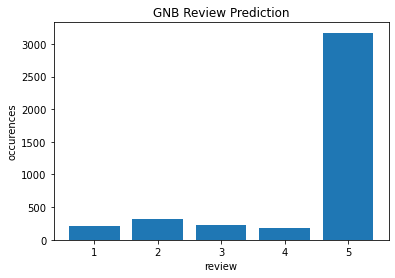

In [20]:
score = gnb.score(new_X_test, y_test_log)
print("Accuracy: {}%".format(int(score*100)))
gnb_pred = gnb.predict(new_X_test)
gnb_pred_data = countReviewOccurences(gnb_pred)
plt.xlabel('review')
plt.ylabel('occurences')
plt.title('GNB Review Prediction')
plt.bar([1, 2, 3, 4, 5], gnb_pred_data)

In [21]:
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(new_X_train, z_train_log)

AdaBoostClassifier(n_estimators=100)

Accuracy: 72%


<BarContainer object of 3 artists>

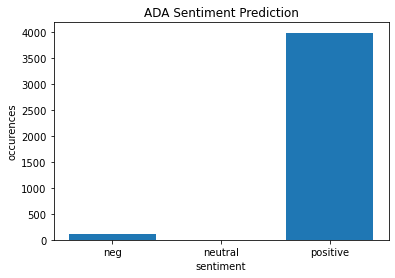

In [22]:
score = ada.score(new_X_test, z_test_log)
print("Accuracy: {}%".format(int(score*100)))
ada_pred = ada.predict(new_X_test)
ada_pred_data = countOccurences(ada_pred)
plt.xlabel('sentiment')
plt.ylabel('occurences')
plt.title('ADA Sentiment Prediction')
plt.bar(['neg', 'neutral', 'positive'], ada_pred_data)

In [23]:
ada.fit(new_X_train, y_train_log)

AdaBoostClassifier(n_estimators=100)

Accuracy: 44%


<BarContainer object of 5 artists>

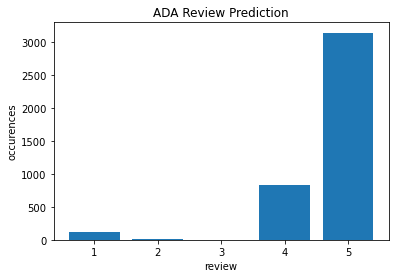

In [24]:
score = ada.score(new_X_test, y_test_log)
print("Accuracy: {}%".format(int(score*100)))
ada_pred = ada.predict(new_X_test)
ada_pred_data = countReviewOccurences(ada_pred)
plt.xlabel('review')
plt.ylabel('occurences')
plt.title('ADA Review Prediction')
plt.bar([1, 2, 3, 4, 5], ada_pred_data)

In [25]:
mlp = MLPClassifier(random_state=1, alpha=0.01, max_iter=600, hidden_layer_sizes=(100,50,150,100,125,75,))
mlp.fit(new_X_train, z_train_log)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, 50, 150, 100, 125, 75),
              max_iter=600, random_state=1)

Accuracy: 60%


<BarContainer object of 3 artists>

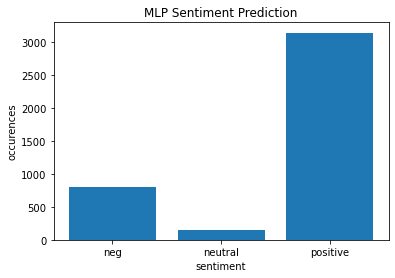

In [26]:
score = mlp.score(new_X_test, z_test_log)
print("Accuracy: {}%".format(int(score*100)))
mlp_pred = mlp.predict(new_X_test)
mlp_pred_data = countOccurences(mlp_pred)
plt.xlabel('sentiment')
plt.ylabel('occurences')
plt.title('MLP Sentiment Prediction')
plt.bar(['neg', 'neutral', 'positive'], mlp_pred_data)

In [27]:
mlp.fit(new_X_train, y_train_log)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, 50, 150, 100, 125, 75),
              max_iter=600, random_state=1)

Accuracy: 38%


<BarContainer object of 5 artists>

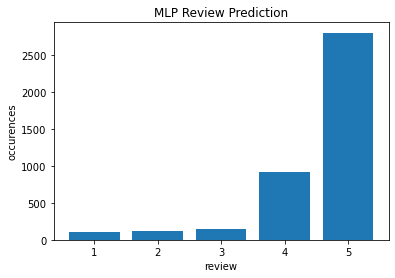

In [28]:
score = mlp.score(new_X_test, y_test_log)
print("Accuracy: {}%".format(int(score*100)))
mlp_pred = mlp.predict(new_X_test)
mlp_pred_data = countReviewOccurences(mlp_pred)
plt.xlabel('review')
plt.ylabel('occurences')
plt.title('MLP Review Prediction')
plt.bar([1, 2, 3, 4, 5], mlp_pred_data)

In [29]:
sent = []
for row in X_clean['clean']:
    sent.append(row.split())
phrases = Phrases(sent, min_count=30, progress_per=10000)
bigram = Phraser(phrases)
sentences = bigram[sent]

In [30]:
cores = multiprocessing.cpu_count()
model = Word2Vec(min_count=5, window=3, size=300, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)

In [31]:
model.build_vocab(sentences, progress_per=10000)
words = model.wv.vocab.keys()

In [32]:
model.train(sentences,total_examples=model.corpus_count,epochs=40)

(65203807, 75892400)

In [33]:
w_counts = CountVectorizer(tokenizer= word_tokenize, ngram_range=(1,1))
w_counts.fit(X_clean['clean'])

C:\Users\NithilSethupathi\.conda\envs\tf\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(tokenizer=<function word_tokenize at 0x000001D706CF3AF0>)

In [34]:
new_X_train_log = w_counts.transform(X_train_log)
new_X_test_log = w_counts.transform(X_test_log)

In [35]:
log = LogisticRegression(solver='saga', max_iter=5000)
log.fit(new_X_train_log, z_train_log)

LogisticRegression(max_iter=5000, solver='saga')

Accuracy: 82%


<BarContainer object of 3 artists>

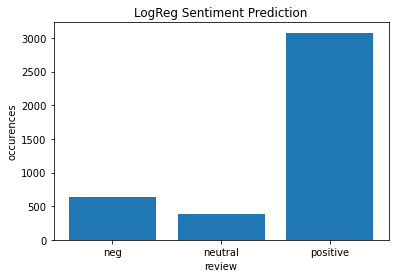

In [36]:
score = log.score(new_X_test_log, z_test_log)
print("Accuracy: {}%".format(int(score*100)))
log_pred = log.predict(new_X_test_log)
log_pred_data = countOccurences(log_pred)
plt.xlabel('review')
plt.ylabel('occurences')
plt.title('LogReg Sentiment Prediction')
plt.bar(['neg', 'neutral', 'positive'], log_pred_data)

In [37]:
log.fit(new_X_train_log, y_train_log)

LogisticRegression(max_iter=5000, solver='saga')

Accuracy: 57%


<BarContainer object of 5 artists>

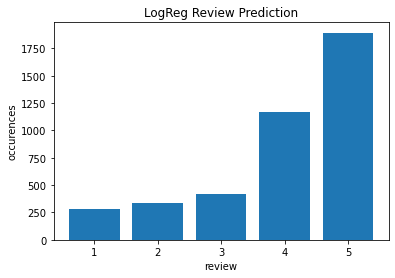

In [38]:
score = log.score(new_X_test_log, y_test_log)
print("Accuracy: {}%".format(int(score*100)))
log_pred = log.predict(new_X_test_log)
log_pred_data = countReviewOccurences(log_pred)
plt.xlabel('review')
plt.ylabel('occurences')
plt.title('LogReg Review Prediction')
plt.bar([1, 2, 3, 4, 5], log_pred_data)

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [40]:
logReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='saga'), n_jobs=-1)),])
logReg_pipeline.fit(new_X_train_log, z_train_log)

Pipeline(steps=[('clf',
                 OneVsRestClassifier(estimator=LogisticRegression(solver='saga'),
                                     n_jobs=-1))])

Accuracy: 84%


<BarContainer object of 3 artists>

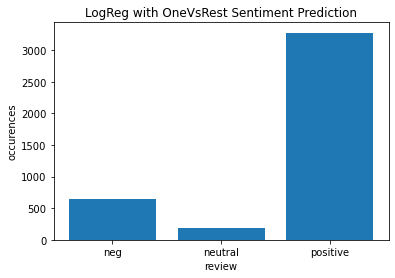

In [41]:
score = logReg_pipeline.score(new_X_test_log, z_test_log)
print("Accuracy: {}%".format(int(score*100)))
log_reg_pred = logReg_pipeline.predict(new_X_test_log)
log_pred_data = countOccurences(log_reg_pred)
plt.xlabel('review')
plt.ylabel('occurences')
plt.title('LogReg with OneVsRest Sentiment Prediction')
plt.bar(['neg', 'neutral', 'positive'], log_pred_data)

Accuracy: 60%


<BarContainer object of 5 artists>

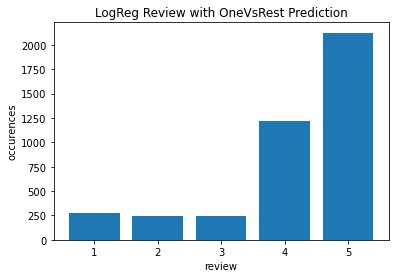

In [42]:
logReg_pipeline.fit(new_X_train_log, y_train_log)
score = logReg_pipeline.score(new_X_test_log, y_test_log)
print("Accuracy: {}%".format(int(score*100)))
log_pred = logReg_pipeline.predict(new_X_test_log)
log_pred_data = countReviewOccurences(log_pred)
plt.xlabel('review')
plt.ylabel('occurences')
plt.title('LogReg Review with OneVsRest Prediction')
plt.bar([1, 2, 3, 4, 5], log_pred_data)

In [43]:
encoding = {1: 0,
            2: 1,
            3: 2,
            4: 3,
            5: 4
           }
ratings = df['Rating'].copy()
ratings.replace(encoding, inplace=True)
ratings

0        3
1        1
2        2
3        4
4        4
        ..
20486    4
20487    3
20488    1
20489    0
20490    1
Name: Rating, Length: 20491, dtype: int64

In [44]:
sentiments = y.apply(lambda x : 2 if x == 5 or x == 4 else(1 if x == 3 else 0))
sentiments

0        2
1        0
2        1
3        2
4        2
        ..
20486    2
20487    2
20488    0
20489    0
20490    0
Name: Rating, Length: 20491, dtype: int64

In [45]:
train_seq1, test_seq1, train_sentiment, test_sentiment = train_test_split(seq, sentiments, train_size=0.8, random_state=100)
train_seq2, test_seq2, train_rating, test_rating = train_test_split(seq, ratings, train_size=0.8, random_state=100)

In [46]:
from sklearn.utils import class_weight

class_weight = dict(
    enumerate(
        class_weight.compute_class_weight(
            class_weight='balanced',
            classes=sentiments.unique(), 
            y=sentiments
        )
    )
)
class_weight

{0: 0.4525497471233905, 1: 2.125181497614603, 2: 3.1274420024420024}

In [47]:
import tensorflow as tf
import tensorflow.keras.layers as L

In [48]:
model_sentiment = tf.keras.Sequential([
    L.Embedding(vocab_s, 8, input_length=max_seq_length),
    L.Bidirectional(L.LSTM(15,return_sequences=True)),
    L.MaxPool1D(),
    L.Flatten(),
    L.Dropout(0.5),
    L.Dense(128, activation="relu"),
    L.Dropout(0.5),
    L.Dense(64, activation="relu"),
    L.Dropout(0.5),
    L.Dense(3, activation="softmax")
])

model_rating = tf.keras.Sequential([
    L.Embedding(vocab_s, 16, input_length=max_seq_length),
    L.Bidirectional(L.LSTM(30,return_sequences=True)),
    L.MaxPool1D(),
    L.Flatten(),
    L.Dropout(0.5),
    L.Dense(64, activation="relu"),
    L.Dropout(0.5),
    L.Dense(5, activation="softmax")
])

In [49]:
model_sentiment.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model_sentiment.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1838, 8)           295296    
_________________________________________________________________
bidirectional (Bidirectional (None, 1838, 30)          2880      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 919, 30)           0         
_________________________________________________________________
flatten (Flatten)            (None, 27570)             0         
_________________________________________________________________
dropout (Dropout)            (None, 27570)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3529088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [50]:
model_rating.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model_rating.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1838, 16)          590592    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1838, 60)          11280     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 919, 60)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 55140)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 55140)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                3529024   
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)               

In [51]:
history_sentiment = model_sentiment.fit(train_seq1, train_sentiment, epochs=10,validation_split=0.12, batch_size=32, verbose=2, callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=2,
            restore_best_weights=True
        )])

Epoch 1/10
451/451 - 344s - loss: 0.5419 - accuracy: 0.8040 - val_loss: 0.3847 - val_accuracy: 0.8537
Epoch 2/10
451/451 - 336s - loss: 0.3452 - accuracy: 0.8640 - val_loss: 0.3898 - val_accuracy: 0.8552
Epoch 3/10
451/451 - 334s - loss: 0.2775 - accuracy: 0.8912 - val_loss: 0.4497 - val_accuracy: 0.8501
Epoch 4/10
451/451 - 335s - loss: 0.2324 - accuracy: 0.9088 - val_loss: 0.5158 - val_accuracy: 0.8415


In [52]:
history_rating = model_rating.fit(train_seq2, train_rating, epochs=10,validation_split=0.12, batch_size=32, verbose=2, callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=2,
            restore_best_weights=True
        )])

Epoch 1/10
451/451 - 383s - loss: 1.1381 - accuracy: 0.4950 - val_loss: 0.8769 - val_accuracy: 0.6067
Epoch 2/10
451/451 - 379s - loss: 0.8089 - accuracy: 0.6485 - val_loss: 0.8467 - val_accuracy: 0.6214
Epoch 3/10
451/451 - 381s - loss: 0.6722 - accuracy: 0.7162 - val_loss: 0.9164 - val_accuracy: 0.6199
Epoch 4/10
451/451 - 382s - loss: 0.5581 - accuracy: 0.7730 - val_loss: 1.0341 - val_accuracy: 0.5976


In [53]:
model_sentiment.evaluate(test_seq1, test_sentiment)

129/129 [==============================] - 13s 97ms/step - loss: 0.3888 - accuracy: 0.8514


[0.3888050615787506, 0.8514271974563599]

In [54]:
model_rating.evaluate(test_seq2, test_rating)

129/129 [==============================] - 15s 120ms/step - loss: 0.8452 - accuracy: 0.6194


[0.8451975584030151, 0.6194193959236145]

In [56]:
sentiment_pred = model_sentiment.predict(test_seq1)
rating_pred = model_rating.predict(test_seq2)

In [57]:
def graph_prep(pred_data, actual_data, flag):
    pred_arr = []
    actual_arr = []
    for arr in pred_data:
        biggest = float('-inf')
        biggest_idx = -1
        for i in range(len(arr)):
            if arr[i] > biggest:
                biggest = arr[i]
                biggest_idx = i
        pred_arr.append(biggest_idx)
    correct = 0
    idx = 0
    actual_arr = []
    if flag == 'sentiment':
        test = test_sentiment
    else:
        test = test_rating
    for num in test:
        actual_arr.append(num)
        if pred_arr[idx] == num:
            correct += 1
        idx += 1
    if flag == 'sentiment':
        graph_pred_data = countOccurences(pred_arr)
        graph_actual_data = countOccurences(actual_data)
    else:
        graph_pred_data = countReviewOccurences(pred_arr)
        graph_actual_data = countReviewOccurences(actual_data)
    return graph_pred_data, graph_actual_data, int((correct / len(test))*100)
        

In [58]:
sentiment_pred_data, sentiment_actual_data, s_score = graph_prep(sentiment_pred, test_sentiment, 'sentiment')
rating_pred_data, rating_actual_data, r_score = graph_prep(rating_pred, test_rating, 'rating')
print("Sentiment prediction accuracy = {}%".format(s_score))
print("Rating prediction accuracy = {}%".format(r_score))

Sentiment prediction accuracy = 85%
Rating prediction accuracy = 61%


In [59]:
def graph_plot(N, pred_data, actual_data, flag):
    ind = np.arange(N)
    width = 0.2
    fig = plt.figure()
    if flag == 'sentiment':
        fig.suptitle('CNN Sentiment Prediction vs Actual Sentiment Distribution')
    else:
        fig.suptitle('CNN Rating Prediction vs Actual Rating Distribution')
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, pred_data, width, color='y')
    rects2 = ax.bar(ind+width+0.1, actual_data, width, color='g')

    ax.set_ylabel('Occurrences')
    ax.set_xticks(ind+width)
    if flag == 'sentiment':
        ax.set_xticklabels( ('negative', 'neutral', 'positive') )
        ax.legend( (rects1[0], rects2[0]), ('Sentiment Prediction', 'Actual Sentiment') )
    else:
        ax.set_xticklabels( ('1', '2', '3', '4', '5') )
        ax.legend( (rects1[0], rects2[0]), ('Rating Prediction', 'Actual Rating') )
    def autolabel(rects):
        for rect in rects:
            h = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 0.05*h, '%d'%int(h),
                ha='center', va='bottom')
    autolabel(rects1)
    autolabel(rects2)
    plt.show()

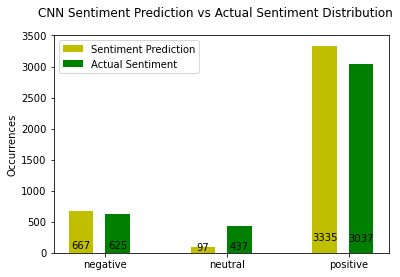

In [60]:
graph_plot(3, sentiment_pred_data, sentiment_actual_data, 'sentiment')

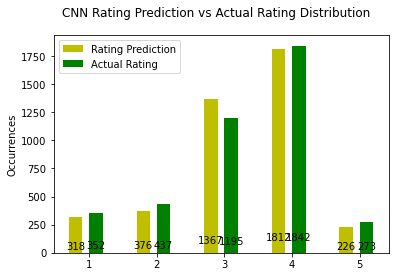

In [61]:
graph_plot(5, rating_pred_data, rating_actual_data, 'rating')